In [1]:
print('this will be my ATL07 workbook')

this will be my ATL07 workbook


In [4]:
! pip install icepyx

In [12]:
# import the necessary packages
import icepyx as ipx
import os
import shutil
import pandas as pd # might not need pandas
import h5py
%matplotlib inline

In [2]:
# define region "bounding box" and time period 
short_name = 'ATL07'
spatial_extent = [-55, 68, -48, 71]
date_range = ['2019-02-20','2019-02-28']

In [3]:
# build the query object - this object is a standardised way to tell icepyx what data you're looking for
region_a = ipx.Query(short_name, spatial_extent, date_range)

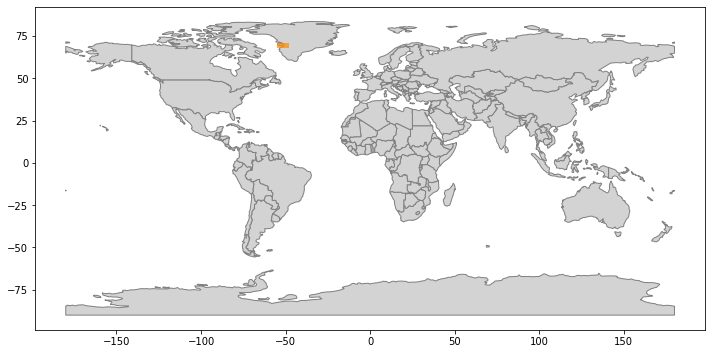

In [4]:
# visualize region on a map
region_a.visualize_spatial_extent()

In [5]:
region_a.dataset_summary_info()
print(region_a.latest_version())

dataset_id :  ATLAS/ICESat-2 L3A Sea Ice Height V003
short_name :  ATL07
version_id :  003
time_start :  2018-10-14T00:00:00.000Z
coordinate_system :  CARTESIAN
summary :  The data set (ATL07) contains along-track heights for sea ice and open water leads (at varying length scales) relative to the WGS84 ellipsoid (ITRF2014 reference frame) after adjustment for geoidal and tidal variations, and inverted barometer effects. Height statistics and apparent reflectance are also provided. The data were acquired by the Advanced Topographic Laser Altimeter System (ATLAS) instrument on board the Ice, Cloud and land Elevation Satellite-2 (ICESat-2) observatory.
orbit_parameters :  {'swath_width': '36.0', 'period': '94.29', 'inclination_angle': '92.0', 'number_of_orbits': '1.0', 'start_circular_latitude': '0.0'}
003


In [6]:
# build and view the parameters that will be submitted in our query
region_a.CMRparams

{'short_name': 'ATL07',
 'version': '003',
 'temporal': '2019-02-20T00:00:00Z,2019-02-28T23:59:59Z',
 'bounding_box': '-55.0,68.0,-48.0,71.0'}

In [7]:
# provide your sign-in credentials - you'll be propted for your password
earthdata_uid = 'romina.piunno'
email = 'romina.piunno@mail.utoronto.ca'
region_a.earthdata_login(earthdata_uid, email)

In [8]:
# specify path where you want your data saved & download
path = '/Users/rominapiunno/Downloads/'
region_a.download_granules(path)

Total number of data order requests is  1  for  4  granules.
Data request  1  of  1  is submitting to NSIDC
order ID:  5000000989142
Initial status of your order request at NSIDC is:  processing
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order is: complete
Beginning download of zipped output...
Data request 5000000989142 of  1  order(s) is downloaded.
Download complete


# Now we need to open, view, and use the ATL07 data we just downloaded. 

In [9]:
# let's choose just 1 file to work with for now
atl_file = 'processed_ATL07-01_20190226002919_09100201_003_02.h5'

In [13]:
with h5py.File(path+atl_file, 'r') as f:  # open file
    seg1 = f['gt1l']                       # read data into memory 

In [18]:
seg1.keys()

TypeError: Not a location id (invalid object ID)